# Predicitve Analytics : Life Expectancy Prediction

## Business Understanding
### Problem Statements
* Dapatkah umur harapan hidup suatu negara diprediksi secara akurat berdasarkan faktor-faktor sosial, ekonomi, dan kesehatan?
* Apa saja faktor yang paling berpengaruh terhadap harapan hidup suatu negara?
* Algoritma regresi mana yang memberikan performa terbaik dalam memprediksi harapan hidup?

### Goals
* Membangun model prediktif untuk memperkirakan nilai harapan hidup berdasarkan data sosial, ekonomi, dan kesehatan.
* Mengidentifikasi fitur-fitur yang paling signifikan dan berkontribusi besar terhadap prediksi harapan hidup.
* Membandingkan performa beberapa algoritma regresi dan memilih model terbaik.

### Solution Statements
* Menerapkan beberapa algoritma regresi, yaitu Linear Regresi, Random Forest, dan Gradient Boosting.
* Melakukan preprocessing data secara lengkap, seperti imputasi missing value, penanganan outlier, encoding, dan stadarisasi.
* Melakukan hyperparameter tuning pada model terbaik untuk meningkatkan performa.
* Menggunakan metrik MAE, MSE, RMSE, dan R² untuk mengevaluasi model.

## Data Understanding
Dataset Life Expectancy (WHO) yang berasal dari Kaggle [Life Expectancy (WHO)](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who). Dataset ini memiliki 2938 baris dan 22 kolom yang terdiri atas 20 kolom numerik dan 2 kolom kategorikal. Penjelasan lebih rinci akan dijelaskan dalam tahap berikut ini:




## Data Understanding

Dalam tahap ini, data akan diproses untuk memahami isi dari dataset.

### Data Loading

#### Import Library

Mengimport seluruh library yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import kagglehub
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

Fungsi semua library yang diimport:
1. **import pandas as pd** : untuk manipulasi dan analisis data
2. **import numpy as np** : untuk operasi numerik dan array multidimensi
3. **import matplotlib.pyplot as plt** : untuk visualisasi data
4. **import seaborn as sns** : untuk visualisasi statistik
5. **from sklearn.impute import SimpleImputer** : untuk mengimputasi nilai yang hilang
6. **import kagglehub** : untuk mengakses dataset dari KaggleHub
7. **from sklearn.preprocessing import RobustScaler** : untuk normalisasi fitur numerik
8. **from sklearn.model_selection import train_test_split** : untuk membagi dataset menjadi data latih dan data uji
9. **from sklearn.linear_model import LinearRegression** : untuk model regresi linier yang memprediksi variabel kontinu
10. **from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor** : untuk mode regresi ensemble berbasis randomforest dan regresi berbasis boosting
11. **from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score** : untuk mengevaluasi model dengan MAE, MSE, dan R^2
12. **from sklearn.model_selection import cross_val_score** : untuk evaluasi model dengan cross-validation
13. **from sklearn.model_selection import RandomizedSearchCV** : untuk tuning hyperparameter dengan pencarian acak menggunakan cross-validation

#### Memuat Dataset

Pada tahap ini memuat dataset ke dalam notebook. Karena dataset memiliki format CSV, maka menggunakan library pandas untuk membacanya.

In [2]:
path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")
file_path = path + "/Life Expectancy Data.csv"
data = pd.read_csv(file_path)

### Exploratory Data Analysis (EDA)

Analisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

#### Cek Tipe Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Terlihat bahwa dataset memiliki 2938 baris dan 22 kolom yang terdiri dari 2 kolom data kategorikal dan 20 kolom data numerik. Berikut adalah seluruh fitur yang ada dalam dataset:
1. Country: berisi 193 negara
2. Year: tahun pengambilan data
3. Status: berisi status dari sebuha negara, negara berkembang atau negara maju
4. Life Expectancy: harapan hidup berdasarkan umur
5. Adult Mortality: kematian orang dewasa per 1000 populasi
6. Infant Deaths: kematian bayi per 1000 populasi
7. Alcohol: konsumsi alcohol per kapita
8. Percentage Expenditure: persentase pengeluaran untuk Kesehatan pada produk domestic bruto per kapita
9. Hepatitis B: cakupan imunisasi pada anak usia 1 tahun
10. Measles: kasus campak yang tercatat per 1000 populasi
11. BMI: rata-rata indeks massa tubuh seluruh populasi
12. Under-five deaths: angka kematian anak dibawah 5 tahun per 1000 kematian
13. Polio: cakupan imunisasi polio pada anak umur 1 tahun
14. Total expenditure: pengeluaran pemerintah umum untuk Kesehatan sebagai persentase dari total pengeluaran pemerintah
15. Diphtheria: cakupan imunisasi Diphtheria tetanus toxoid dan pertussis (DTP3) pada anak umur 1 tahun
16. HIV/AIDS: kematian per 1000 kelahiran hidup anak dengan HIV/AIDS (0-4 tahun)
17. GDP: produk domestic bruto per kapita di USD
18. Population: populasi dari negara
19. Thinness 10-19 years: prevalensi kurus pada anak dan remaja usia 10-19 tahun
20. Thinness 5-9 years: prevalensi kurus pada anak dan remaja usia 5-9 tahun
21. Income composition: Indeks Pembangunan Manusia dalam hal komposisi pendapatan sumber daya (indeks berkisar antara 0 sampai 1)
22. Schooling: Jumlah Tahun Sekolah (tahun)


Dengan tipe data sebagai berikut:
* Terdapat 2 tipe data object
* Terdapat 4 tipe data int64
* Terdapat 16 tipe data float64

#### Ganti Nama Kolom yang Salah/Tidak Rapih


In [4]:
data.rename(columns={' thinness  1-19 years': 'thinness 10-19 years', 'Life expectancy ': 'Life expectancy', 'Measless ': 'Measless', ' BMI ': 'BMI', 'under-five deaths ': 'under-five deaths', 'Diphtheria ': 'Diphtheria', ' HIV/AIDS':'HIV/AIDS', ' thinness 5-9 years':'thinness 5-9 years'}, inplace=True)

Terdapat kesalahan penamaan pada kolom thinness  1-19 years, isi dari kolom tersebut adalah data orang dari umur 10-19 tahun, sehingga kolom itu harus diganti namanya. Selain itu, terdapat beberapa kolom yang penamaannya tidak rapih.

#### Cek Isi Baris

In [5]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### Cek Deskripsi Statistik

In [6]:
data.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


Fungsi describe digunakan untuk memberikan informasi statistik.

* Count adalah jumlah sampel pada data.
* Mean adalah nilai rata-rata.
* Std adalah standar deviasi.
* Min yaitu nilai minimum.
* 25% adalah kuartil pertama.
* 50% adalah kuartil kedua.
* 75% adalah kuartil ketiga.
* Max adalah nilai maksimum.

#### Cek Data Hilang dan Penanganannya

In [7]:
missing_values = data.isna().sum()
print(missing_values)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 10-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


Terlihat bahwa dalam dataset terdapat missing value. Karena data yang hilang semuanya berada pada kolom numerik, maka solusi yang dapat dilakukan adalah dengan imputasi atau mengisi missing value dengan median.

Walaupun penanganan missing value termasuk tahap data preparation, namun tetap dilakukan sebelum EDA agar hasil dari EDA dapat memberikan hasil yang maksimal.

In [8]:
# Imputasi semua missing values numerik kontinu dengan median
data.fillna(data.median(numeric_only=True), inplace=True)
print(data.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 10-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


Setelah imputasi dilakukan, sudah tidak ada lagi data yang hilang.

#### Cek Duplikasi Data

In [9]:
duplicates = data.duplicated()
print("Baris duplikat:", duplicates.sum())

Baris duplikat: 0


Tidak terdapat data yang terduplikasi

### EDA - Univariate Analysis

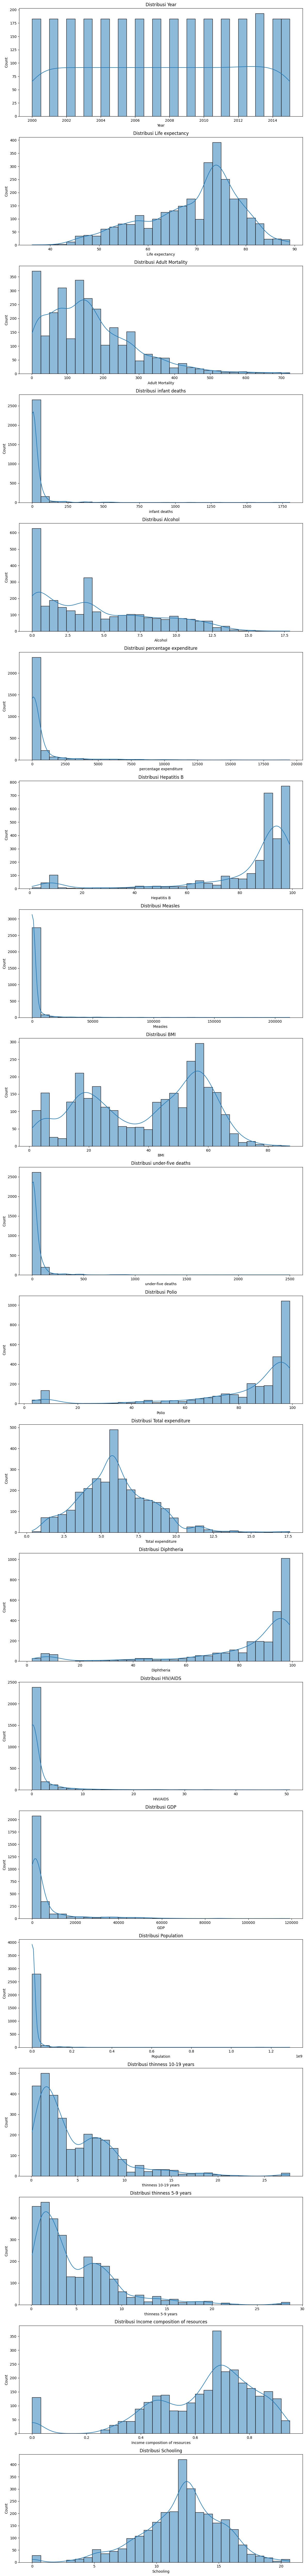

In [10]:
numeric_features = data.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 100))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(20, 1, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

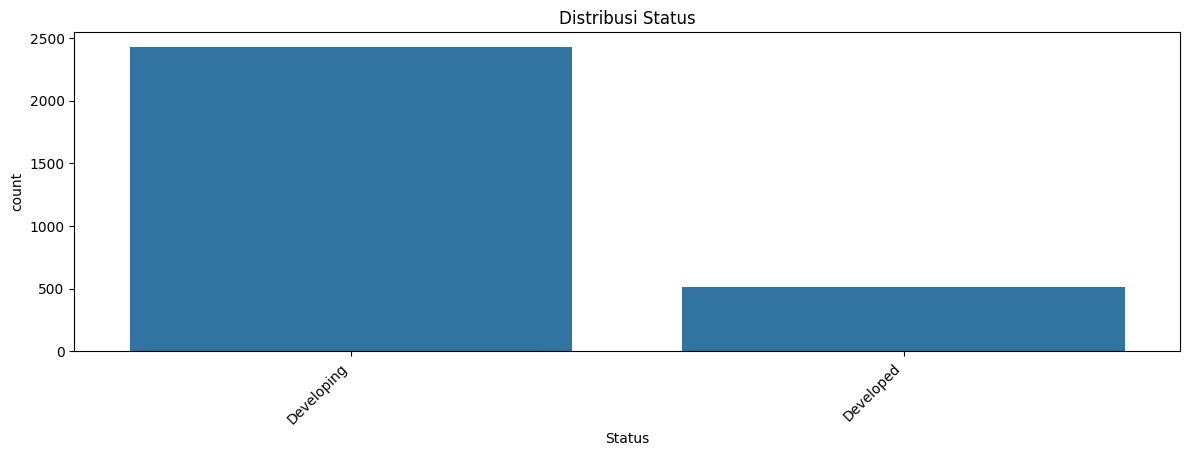

In [11]:
categorical_features = ['Status']
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 1, i)
    sns.countplot(x=data[col])
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pada distribusi data kategorikal hanya menampilkan kolom status, karena kolom country memiliki banyak jenis yang membuatnya tidak memungkinkan untuk ditampilkan dalam bentuk subplot.

In [12]:
print("Jumlah Negara:", data['Country'].nunique())
country_counts = data['Country'].value_counts()
print(country_counts)

Jumlah Negara: 193
Country
Afghanistan              16
Albania                  16
Algeria                  16
Angola                   16
Antigua and Barbuda      16
                         ..
Monaco                    1
Marshall Islands          1
Saint Kitts and Nevis     1
San Marino                1
Tuvalu                    1
Name: count, Length: 193, dtype: int64


Berikut adalah distribusi dari kolom Country, terdapat 193 negara di dalamnya.

### Correlation Matrix

Digunakan untuk melihat fitur apa saja yang memiliki korelasi.

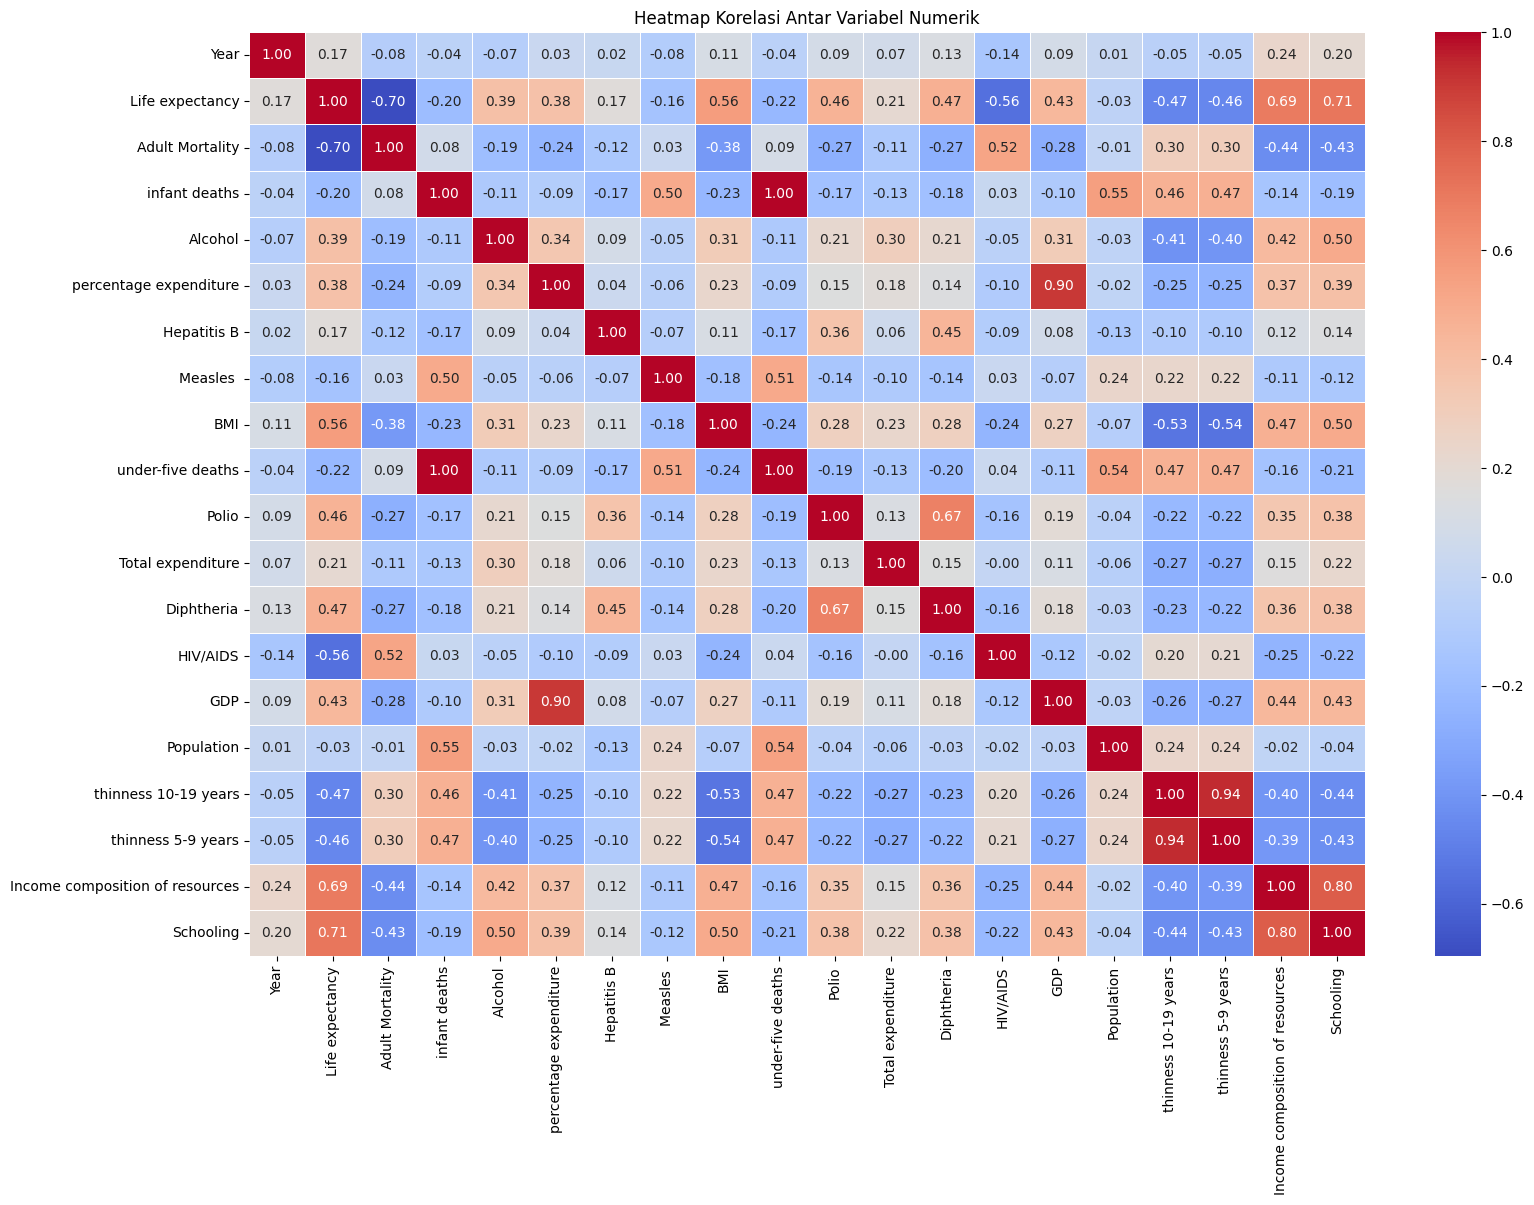

In [13]:
correlation = data[numeric_features].corr()
plt.figure(figsize=(18, 12))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

Terdapat beberapa kolom numerik yang memiliki korelasi yang cukup tinggi, seperti kolom GDP dengan kolom percentage expenditure. Kolom-kolom yang memiliki korelasi tinggi, akan dihapus salah satunya untuk menghindari bias pada data.

## Data Preparation

Teknik yang akan dilakukan:
* Fitur selection : menghapus beberapa fitur yang tidak relevan dan berkorelasi tinggi
* Outliers checking & handling : Mengurangi outliers
* Standarisasi : Menyamakan skala fitur
* Label encoding : Mengubah fitur kategorikal menjadi numerik
* Split data : Membagi dataset menjadi 2, yaitu data latih (70%) dan data uji (20%)

### Fitur Selection


In [14]:
print(data.columns.tolist())

['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [15]:
# Contoh drop kolom dengan korelasi sangat tinggi
data = data.drop(['infant deaths', 'percentage expenditure', 'Country', 'thinness 10-19 years', 'Hepatitis B'], axis=1)

### Outlier Checking & Handling

Boxplot sebelum IQR Method

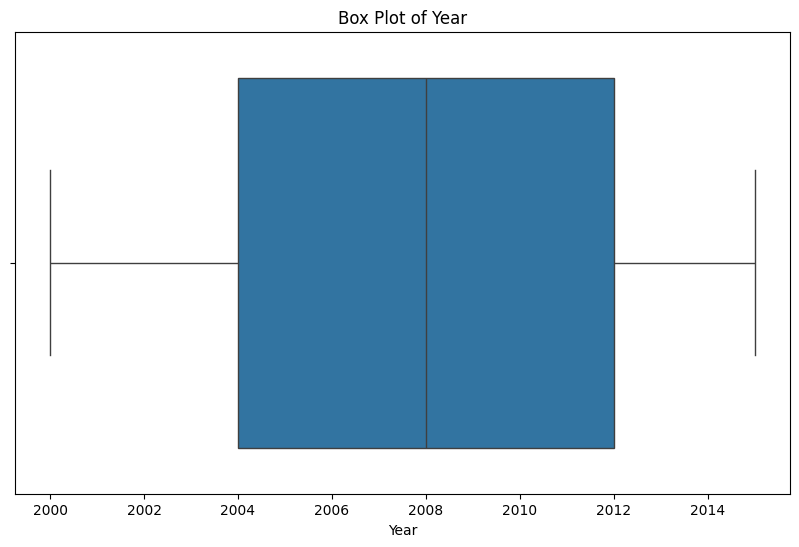

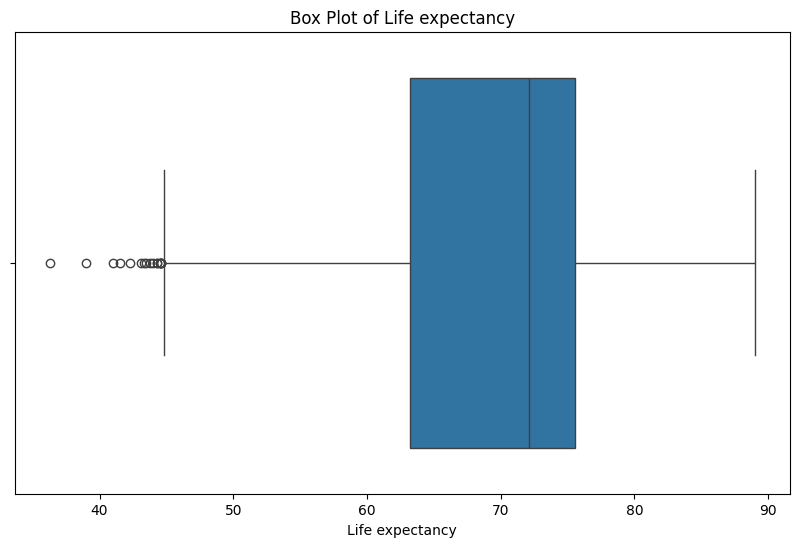

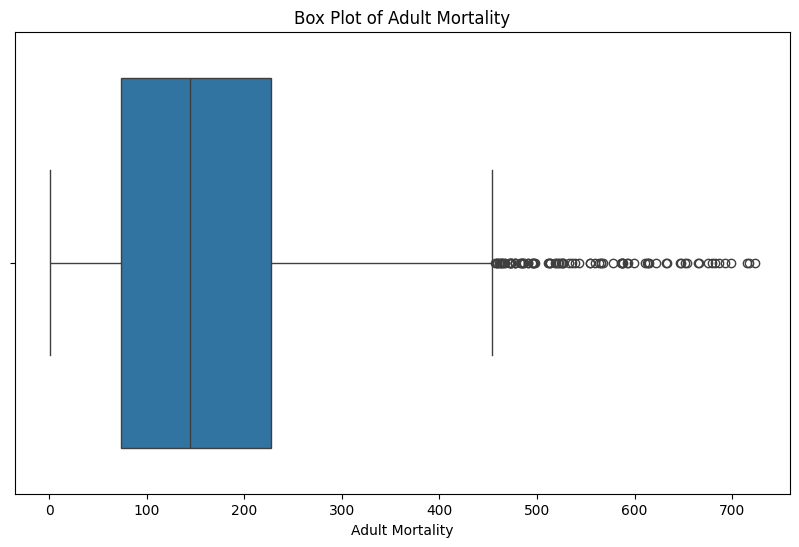

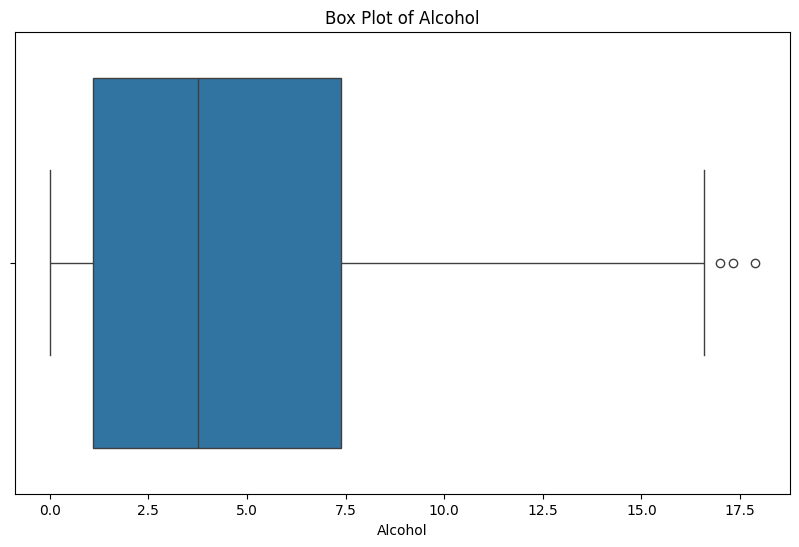

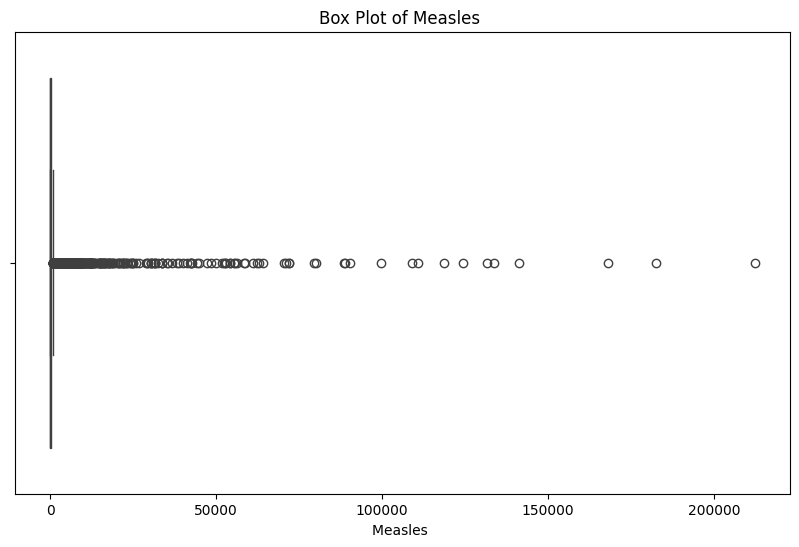

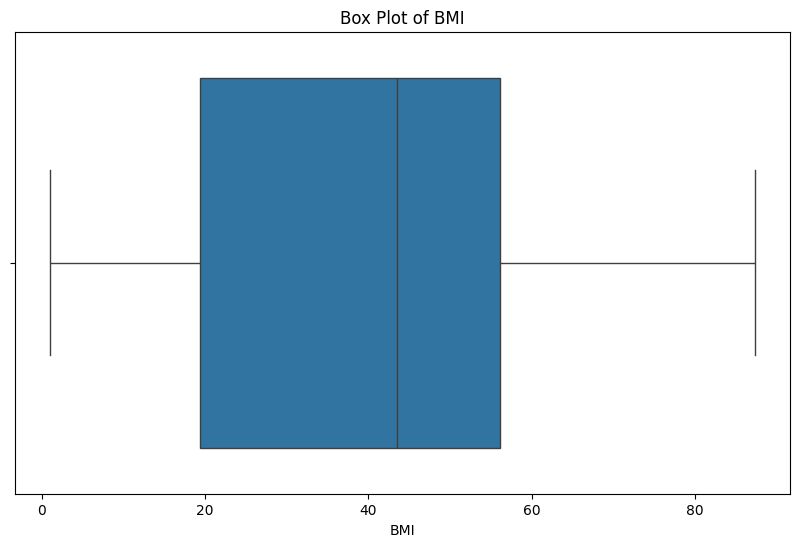

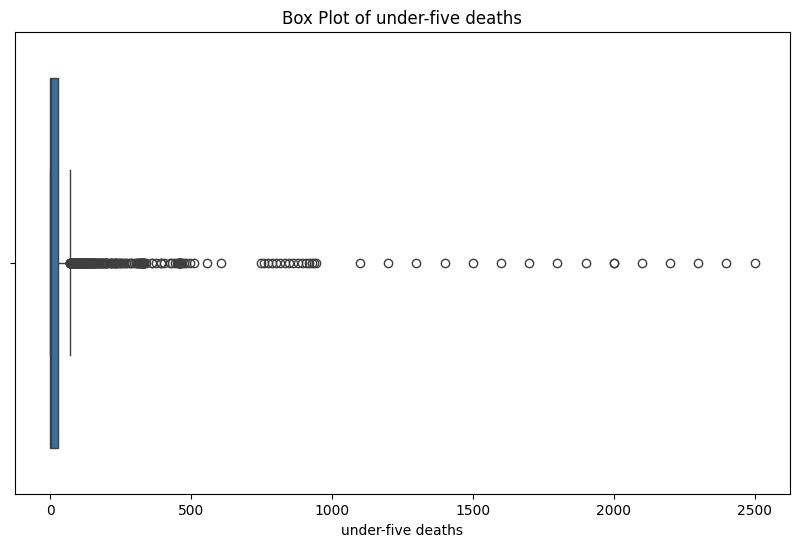

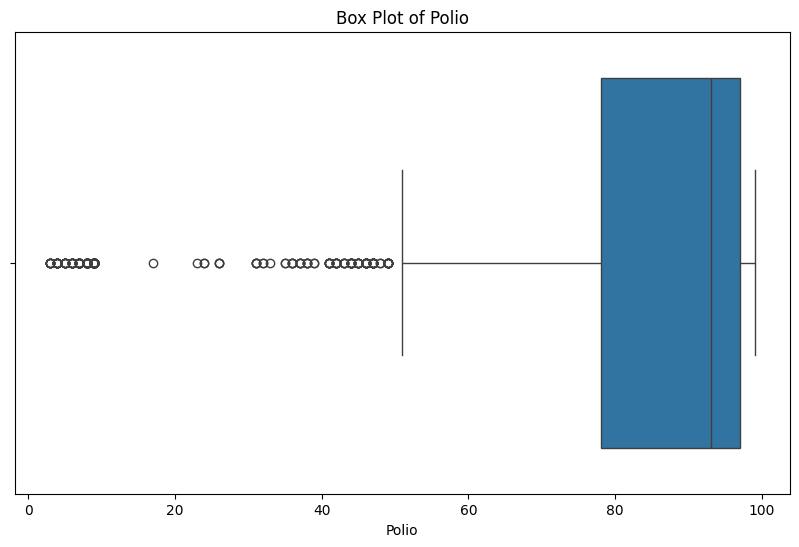

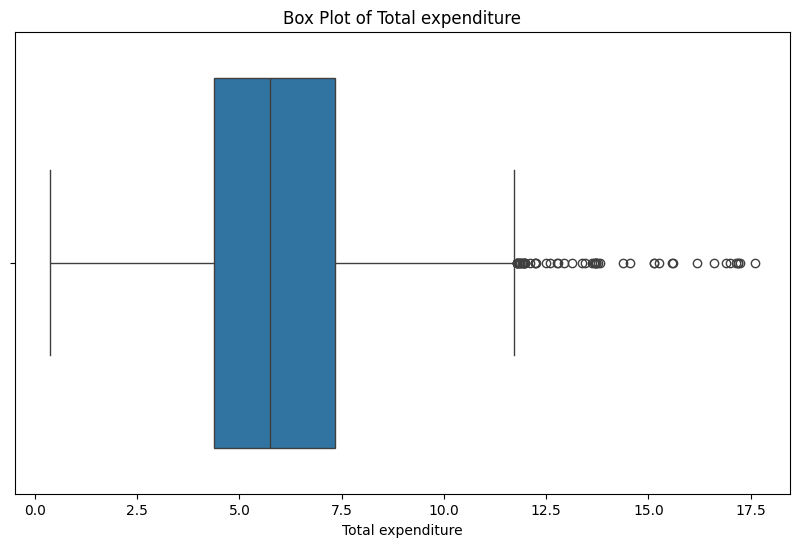

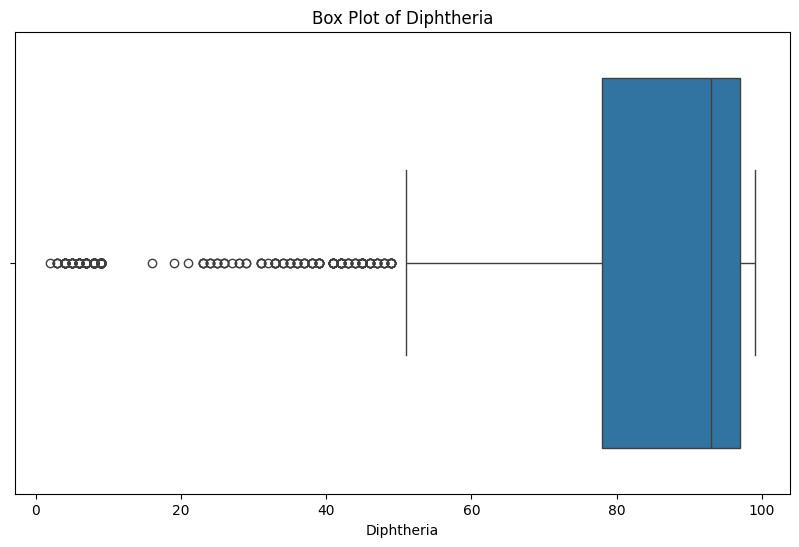

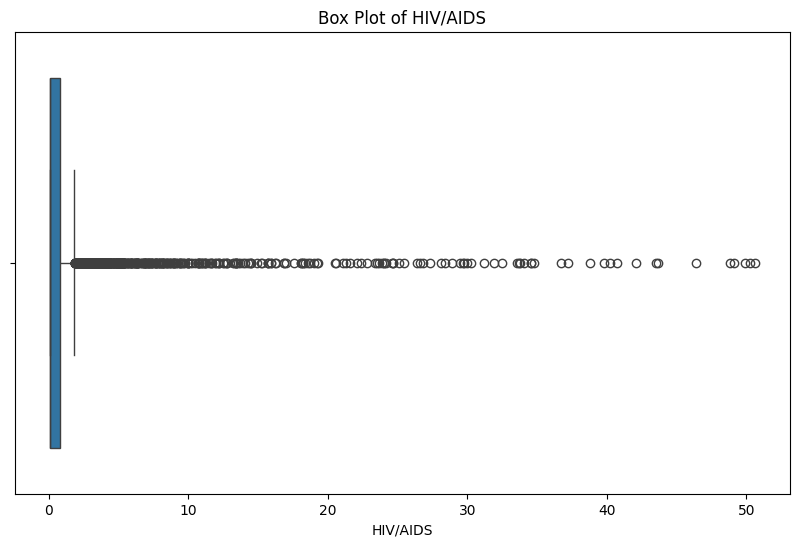

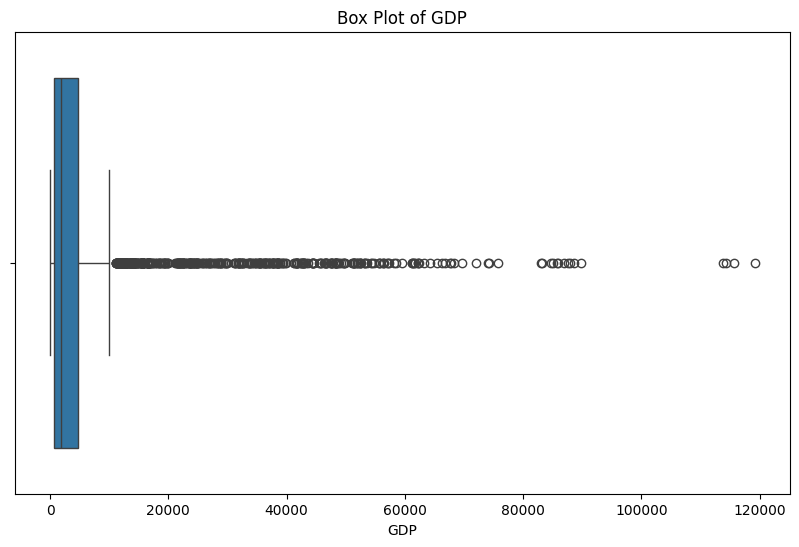

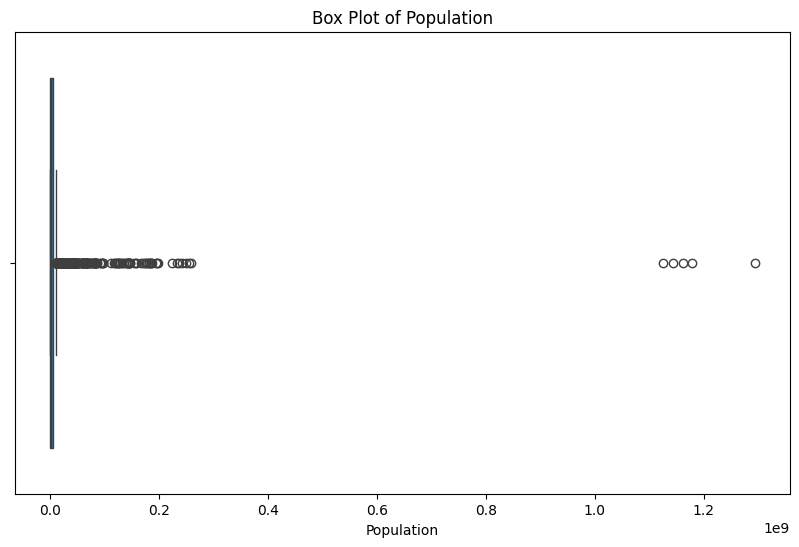

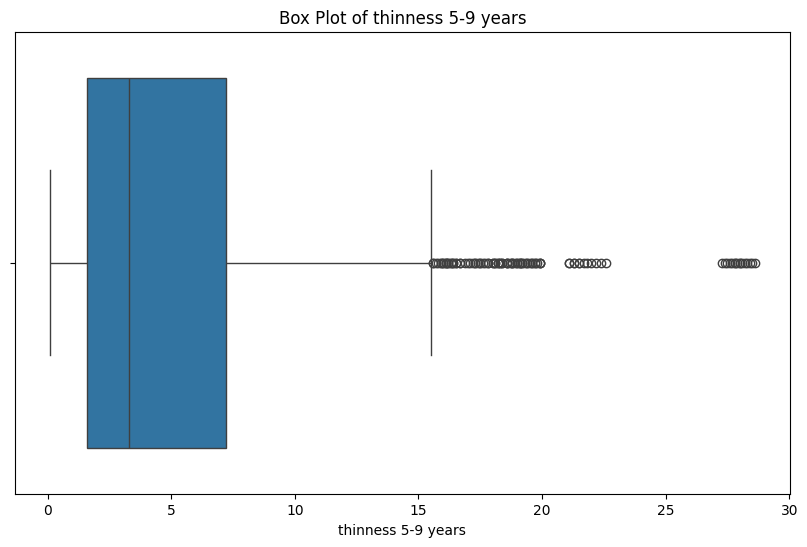

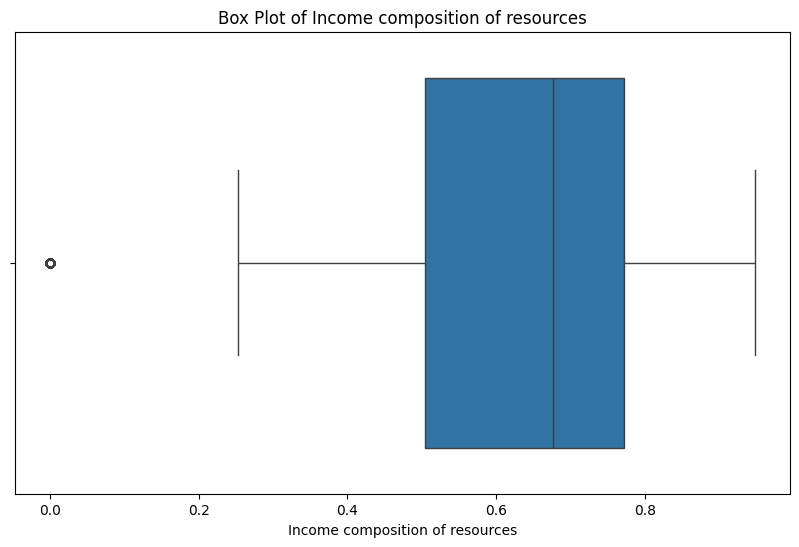

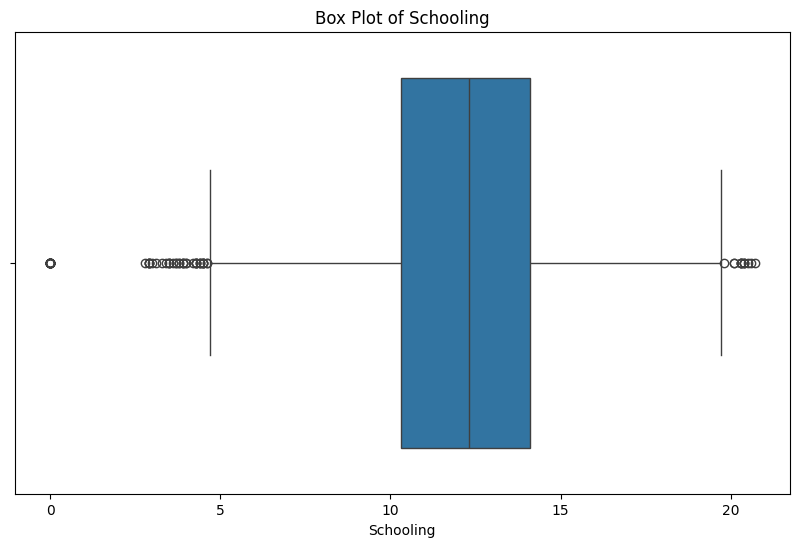

In [16]:
num_cols = data.select_dtypes(include=['number']).columns
for feature in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

Terdapat beberapa kolom dengan outlier tinggi.

In [17]:
# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((data[num_cols] < (Q1 - 1.5 * IQR)) | (data[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
data_filtered_numeric = data.loc[condition, num_cols]

# Menggabungkan kembali dengan kolom kategorikal
df = pd.concat([data_filtered_numeric, data.loc[condition, categorical_features]], axis=1)

Tahap ini dilakukan dengan tujuan untuk menghapus outliers atau data-data yang berada di luar IQR. Penghapusan dilakukan agar hasil model tidak terpengaruh oleh outliers.

`num_cols` adalah variabel yang memanggil fitur-fitur numerik dari dataset.
```
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1
```
* Q1 (Kuartil 1): Nilai yang memisahkan 25% data terendah dari 75% data lainnya.
* Q3 (Kuartil 3): Nilai yang memisahkan 75% data terendah dari 25% data tertinggi.
* IQR (Interquartile Range): Rentang antara Q3 dan Q1. Ini mengukur sebaran nilai tengah dari data.




Boxplot setelah IQR Method

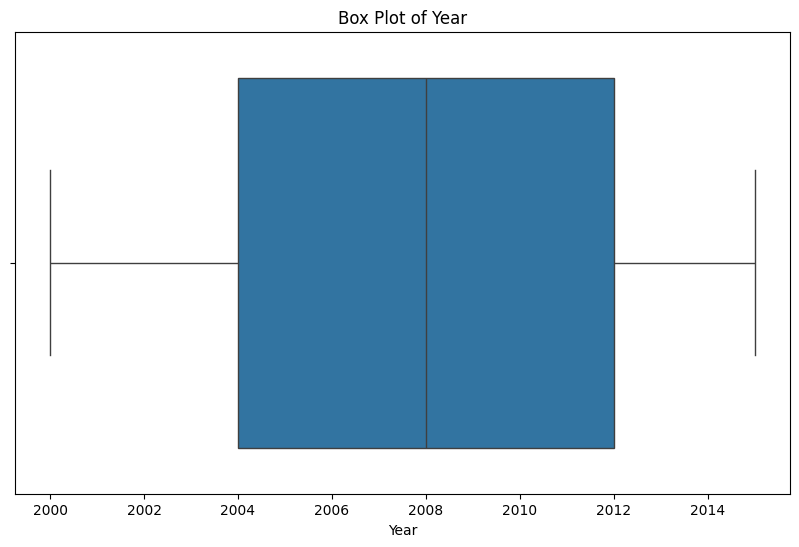

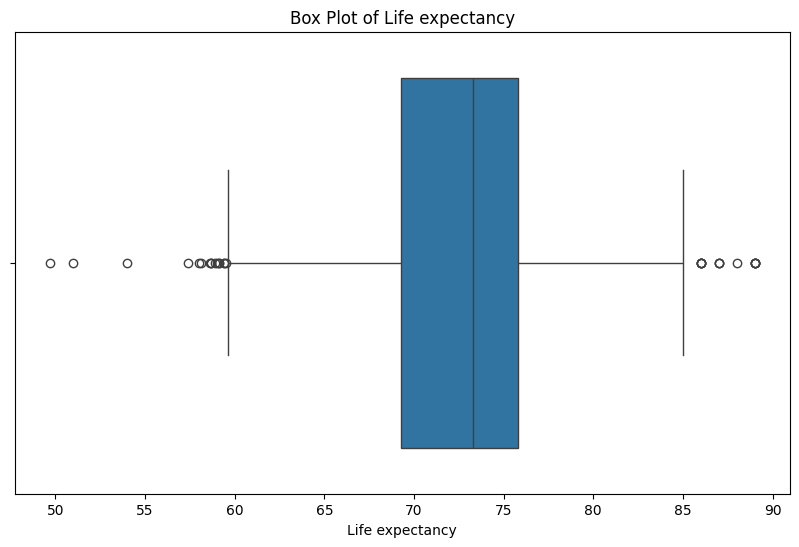

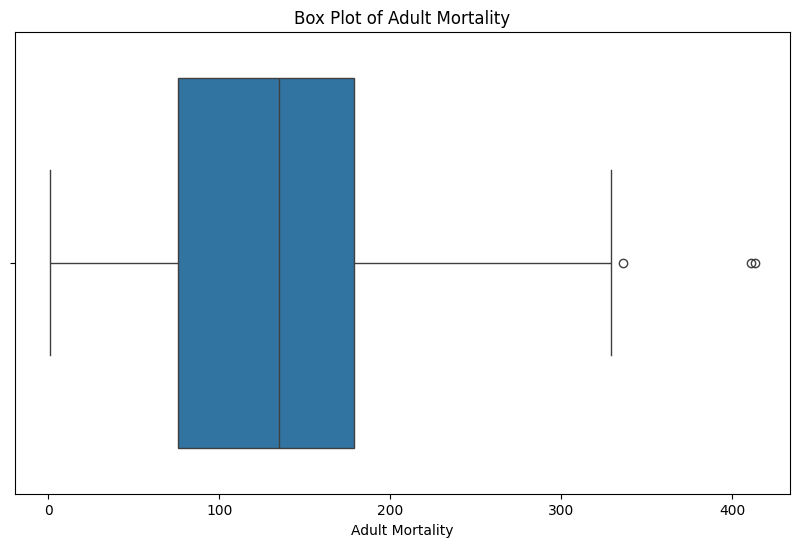

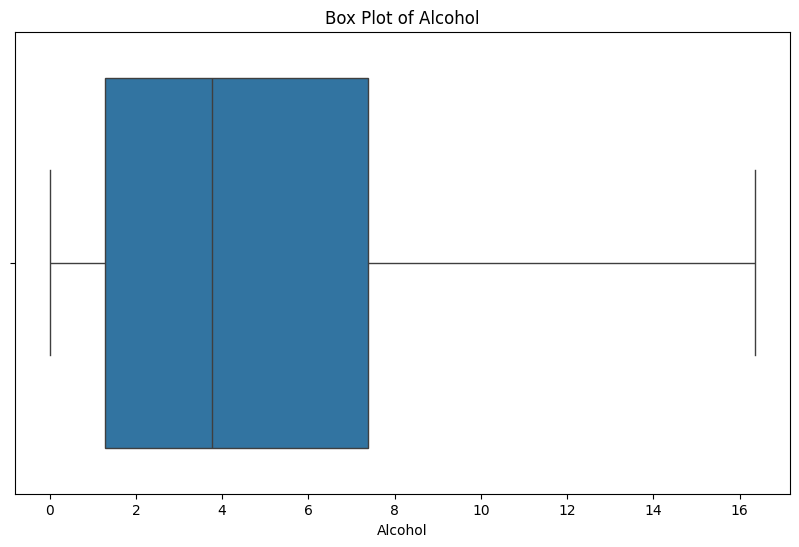

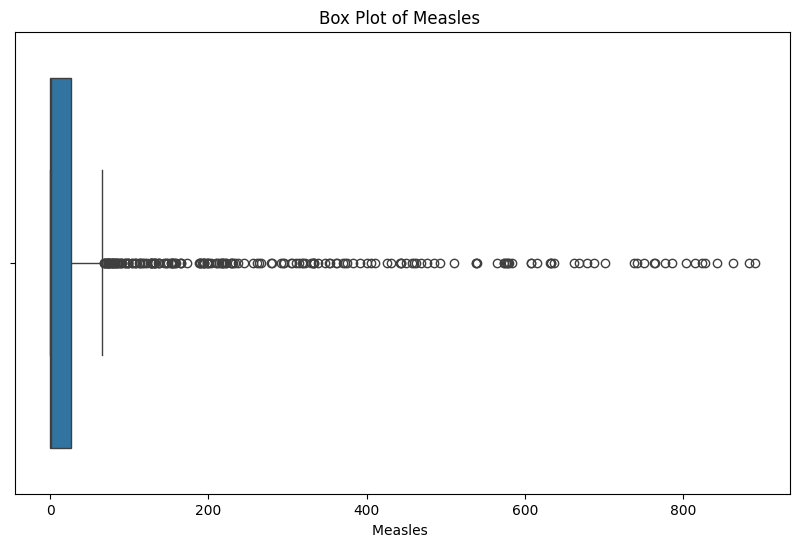

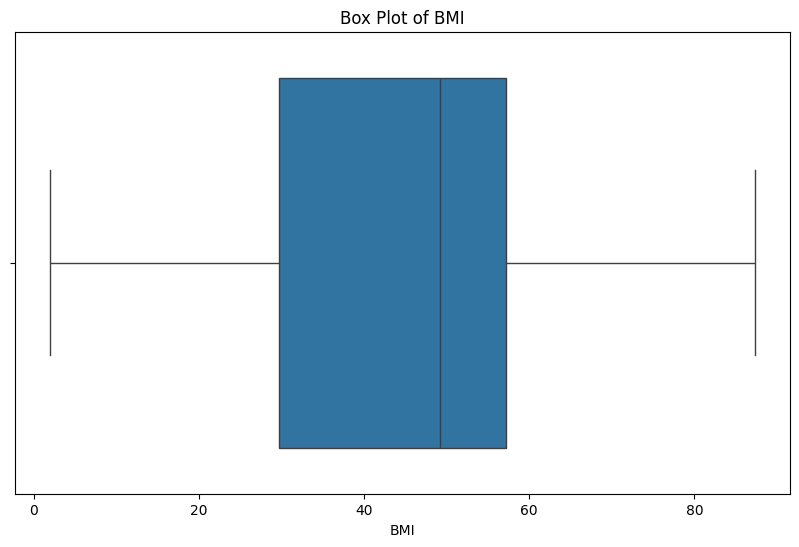

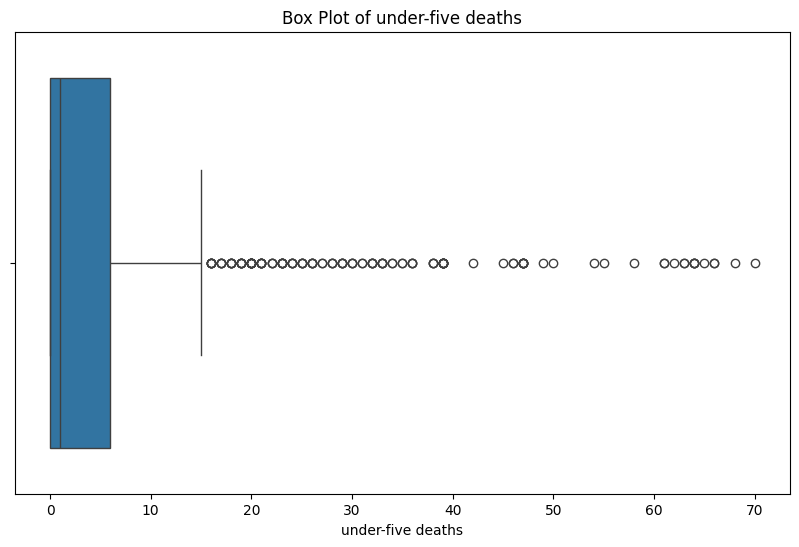

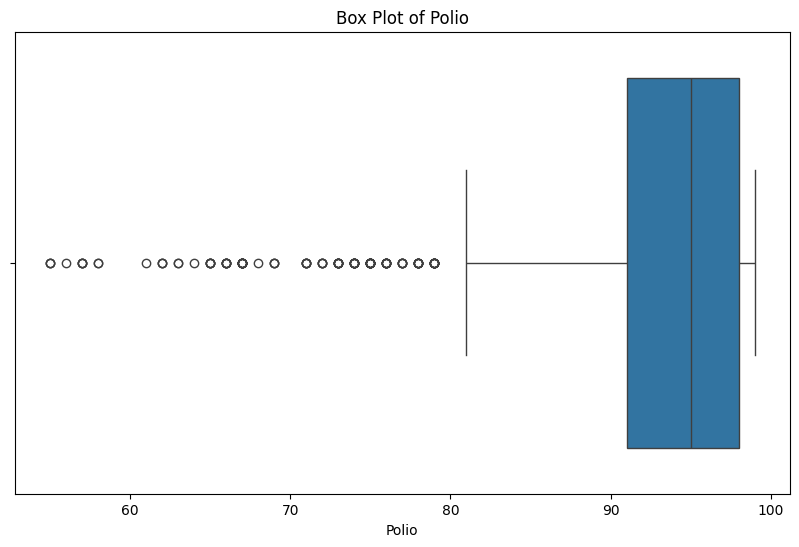

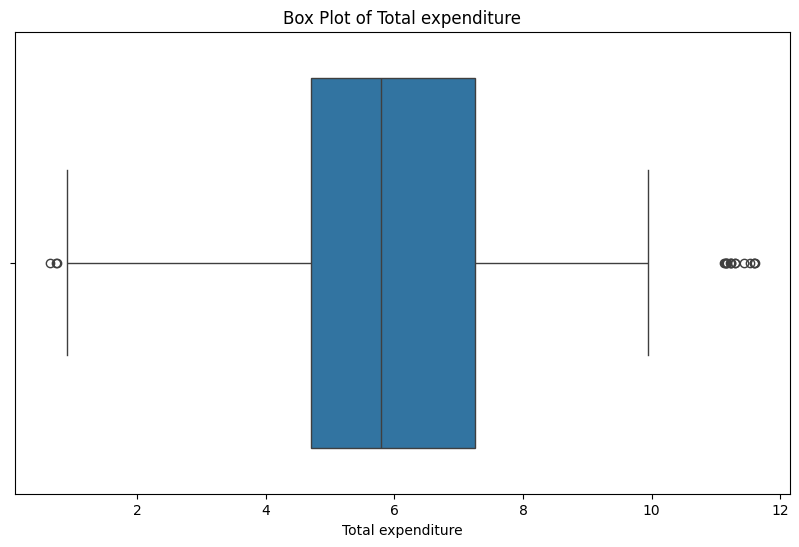

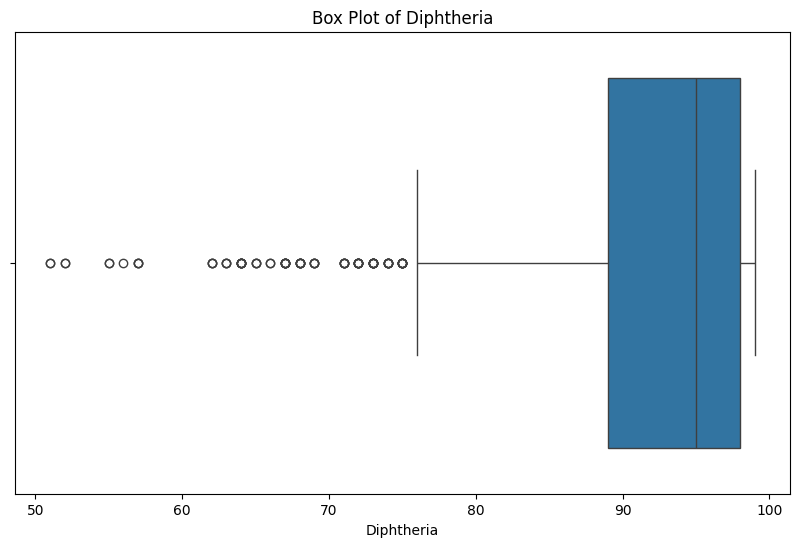

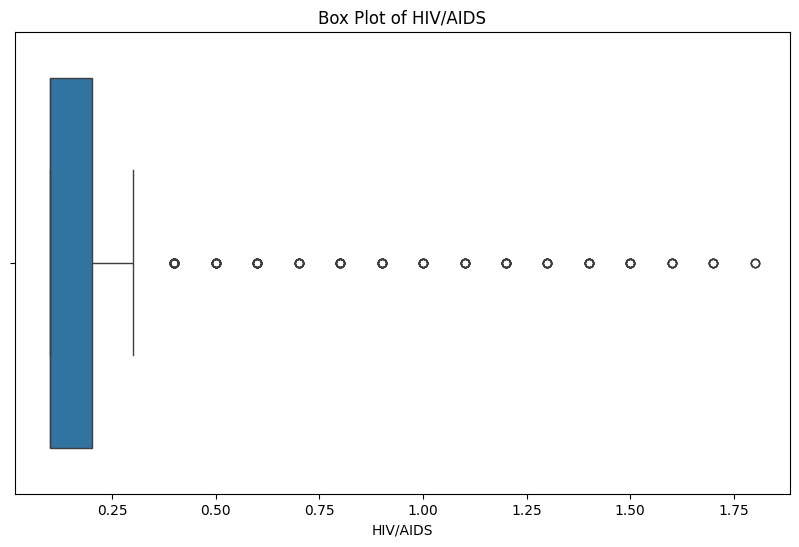

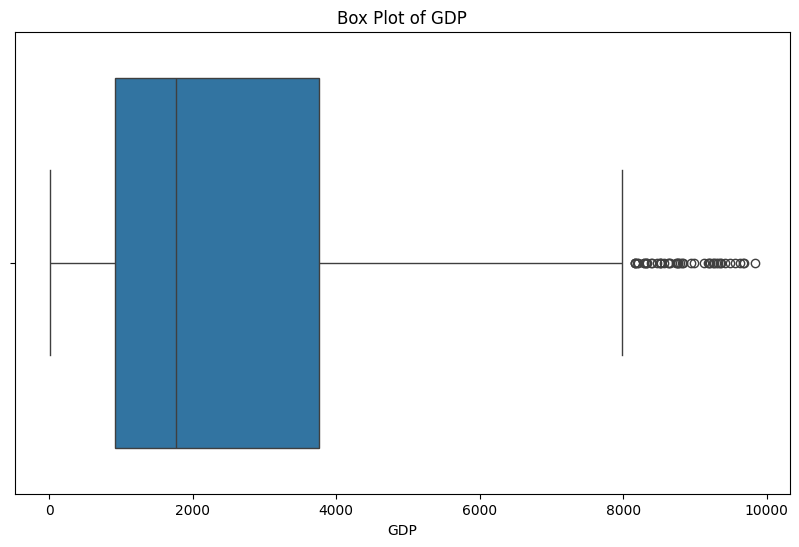

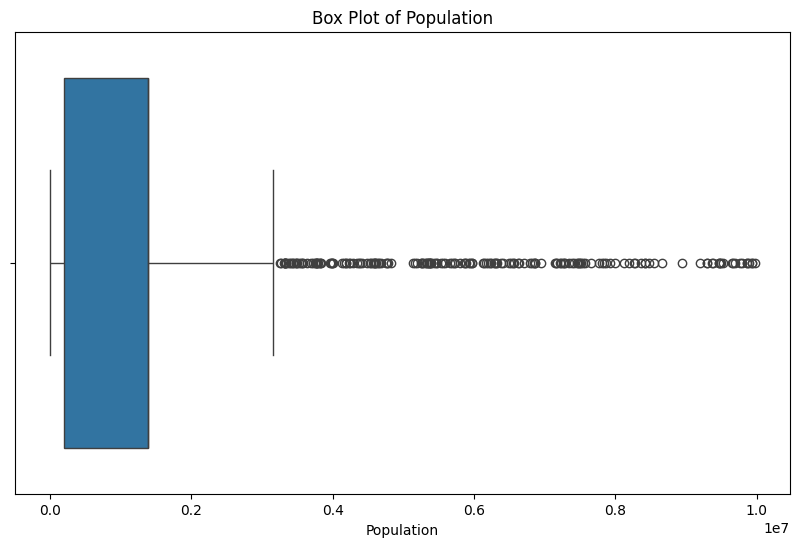

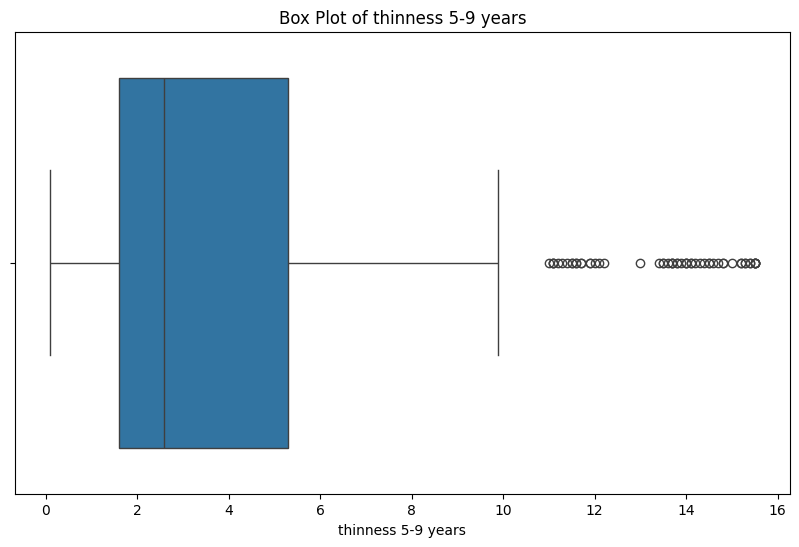

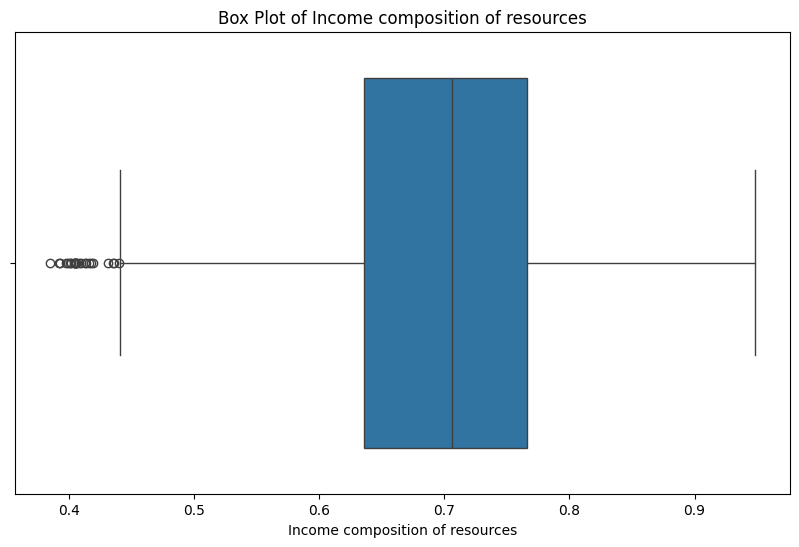

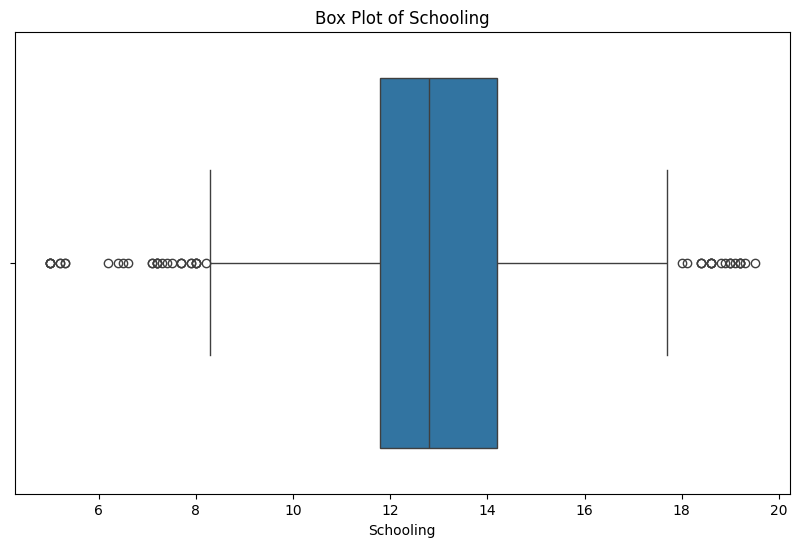

In [18]:
for feature in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [19]:
print("Data awal:", data.shape)
print("Data setelah filter outlier:", df.shape)

Data awal: (2938, 17)
Data setelah filter outlier: (1149, 17)


Setelah penanganan oulier terhadap kolom numerik, data berkurang menjadi 1149 baris.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 16 to 2905
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1149 non-null   int64  
 1   Life expectancy                  1149 non-null   float64
 2   Adult Mortality                  1149 non-null   float64
 3   Alcohol                          1149 non-null   float64
 4   Measles                          1149 non-null   int64  
 5   BMI                              1149 non-null   float64
 6   under-five deaths                1149 non-null   int64  
 7   Polio                            1149 non-null   float64
 8   Total expenditure                1149 non-null   float64
 9   Diphtheria                       1149 non-null   float64
 10  HIV/AIDS                         1149 non-null   float64
 11  GDP                              1149 non-null   float64
 12  Population              

### Standarisasi

Standarisasi dilakukan dengan menggunakan Robust Scaler

In [21]:
target_col = 'Life expectancy'
new_data_robust = df.copy()
num_cols_wo_target = [col for col in num_cols if col != target_col]
scaler = RobustScaler()
new_data_robust[num_cols_wo_target] = scaler.fit_transform(df[num_cols_wo_target])

Penggunaan Robust Scaler bertujuan untuk menstandarisasi fitur numerik agar memiliki nilai yang sama. Robust Scaler menggunakan median dan IQR Method untuk menstandarisasi nilai. Dengan menggunakan Robust Scaler, hasil standarisasi lebih tahan terhadap outlier.

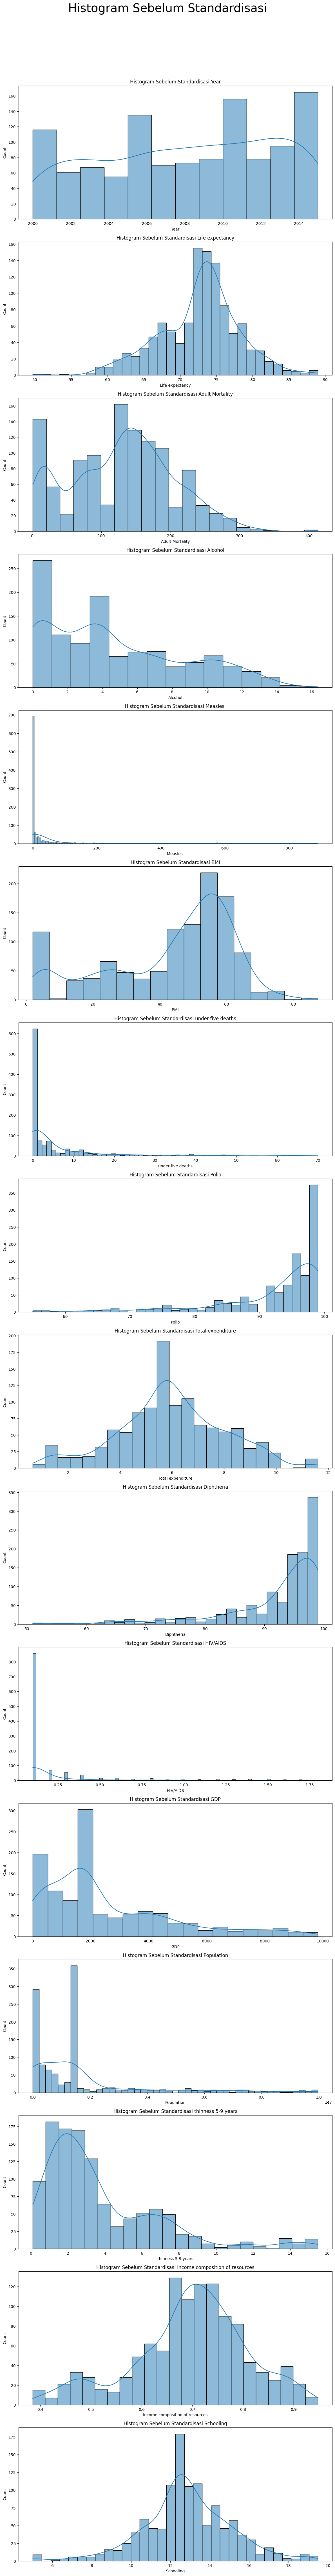

In [22]:
# Histogram Sebelum Standardisasi
plt.figure(figsize=(12, 100))
for i, col in enumerate(num_cols, 1):
    plt.subplot(18, 1, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram Sebelum Standardisasi {col}")
plt.suptitle("Histogram Sebelum Standardisasi", fontsize=30, y=1.02)
plt.tight_layout()
plt.show()

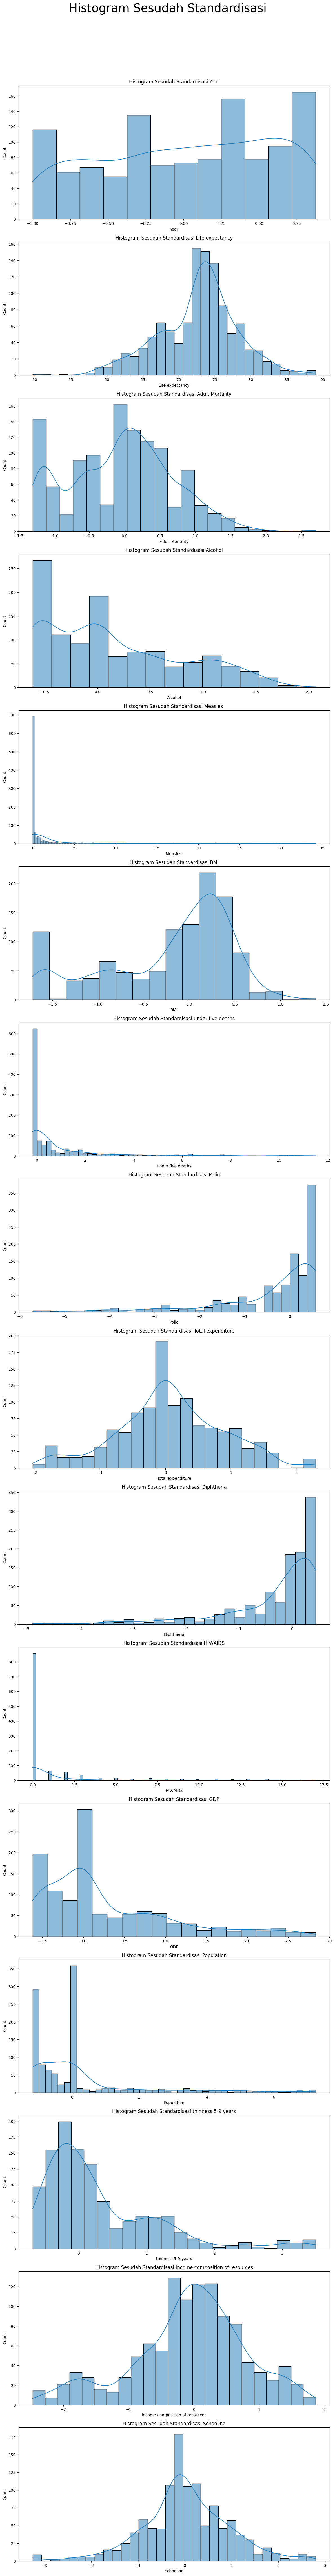

In [23]:
# Histogram Sesudah Standardisasi
plt.figure(figsize=(12, 100))
for i, col in enumerate(num_cols, 1):
    plt.subplot(18, 1, i)
    sns.histplot(new_data_robust[col], kde=True)
    plt.title(f"Histogram Sesudah Standardisasi {col}")
plt.suptitle("Histogram Sesudah Standardisasi", fontsize=30, y=1.02)
plt.tight_layout()
plt.show()

### Label **Encoding**

Mengubah kolom kategorikal menjadi kolom numerik menggunakan One-Hot Encoding.

In [24]:
new_data_robust[categorical_features]

,Status
16,Developing
17,Developing
18,Developing
19,Developing
20,Developing
...,...
2897,Developing
2898,Developing
2903,Developing
2904,Developing


In [25]:
new_one_hot_encoded = pd.get_dummies(new_data_robust[categorical_features]).astype(int)
new_data_wo_nominal = new_data_robust.drop(columns=categorical_features)
new_data = pd.concat([new_data_wo_nominal, new_one_hot_encoded], axis=1)
new_data.head()

,Year,Life expectancy,Adult Mortality,Alcohol,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
16,0.875,77.8,-0.592233,0.138525,-0.038462,0.320000,-0.166667,0.571429,0.082677,0.444444,0.0,0.767633,-1.143946,-0.351351,0.430769,0.583333,0,1
17,0.750,77.5,-1.233010,0.123770,-0.038462,0.290909,0.000000,0.428571,0.035433,0.333333,0.0,0.985763,-0.924840,-0.351351,0.423077,0.583333,0,1
18,0.625,77.2,-0.495146,0.164754,-0.038462,0.265455,0.000000,0.571429,-0.051181,0.444444,0.0,0.929246,-0.924269,-0.324324,0.407692,0.583333,0,1
19,0.500,76.9,-0.475728,0.227049,0.307692,0.240000,0.000000,0.571429,-0.078740,0.444444,0.0,0.870598,-1.165795,-0.324324,0.353846,0.583333,0,1
20,0.375,76.6,-0.456311,0.264754,1.038462,0.214545,0.000000,0.571429,-0.031496,0.444444,0.0,0.937127,-0.919548,-0.297297,0.246154,0.208333,0,1


##### Data Bersih

Berikut adalah info dari data yang sudah bersih.

In [26]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 16 to 2905
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1149 non-null   float64
 1   Life expectancy                  1149 non-null   float64
 2   Adult Mortality                  1149 non-null   float64
 3   Alcohol                          1149 non-null   float64
 4   Measles                          1149 non-null   float64
 5   BMI                              1149 non-null   float64
 6   under-five deaths                1149 non-null   float64
 7   Polio                            1149 non-null   float64
 8   Total expenditure                1149 non-null   float64
 9   Diphtheria                       1149 non-null   float64
 10  HIV/AIDS                         1149 non-null   float64
 11  GDP                              1149 non-null   float64
 12  Population              

### Split Data

In [27]:
y = new_data['Life expectancy']
X = new_data.drop(columns=['Life expectancy'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Membagi data menjadi 2 untuk fitur menjadi variabel X dan label menjadi variabel y, dengan ukuran 70% data uji dan 30% data tes.


In [28]:
X

,Year,Adult Mortality,Alcohol,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
16,0.875,-0.592233,0.138525,-0.038462,0.320000,-0.166667,0.571429,0.082677,0.444444,0.0,0.767633,-1.143946,-0.351351,0.430769,0.583333,0,1
17,0.750,-1.233010,0.123770,-0.038462,0.290909,0.000000,0.428571,0.035433,0.333333,0.0,0.985763,-0.924840,-0.351351,0.423077,0.583333,0,1
18,0.625,-0.495146,0.164754,-0.038462,0.265455,0.000000,0.571429,-0.051181,0.444444,0.0,0.929246,-0.924269,-0.324324,0.407692,0.583333,0,1
19,0.500,-0.475728,0.227049,0.307692,0.240000,0.000000,0.571429,-0.078740,0.444444,0.0,0.870598,-1.165795,-0.324324,0.353846,0.583333,0,1
20,0.375,-0.456311,0.264754,1.038462,0.214545,0.000000,0.571429,-0.031496,0.444444,0.0,0.937127,-0.919548,-0.297297,0.246154,0.208333,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,0.000,1.000000,-0.609016,0.230769,-0.490909,7.666667,-2.428571,-0.263780,-1.888889,0.0,0.000000,0.000000,3.000000,-1.738462,-1.791667,0,1
2898,-0.125,-1.077670,-0.607377,0.461538,-0.512727,8.000000,-2.285714,-0.342520,-1.777778,0.0,0.000000,0.000000,3.027027,-1.761538,-1.750000,0,1
2903,-0.750,-1.067961,-0.604098,34.192308,-0.618182,10.000000,-4.428571,-0.618110,-3.333333,0.0,0.000000,0.000000,3.081081,-1.969231,-2.000000,0,1
2904,-0.875,1.126214,-0.602459,18.615385,-0.636364,10.333333,-3.142857,-0.570866,-2.444444,0.0,0.000000,0.000000,3.081081,-2.015385,-2.041667,0,1


In [29]:
y

,Life expectancy
16,77.8
17,77.5
18,77.2
19,76.9
20,76.6
...,...
2897,63.8
2898,63.4
2903,61.5
2904,61.1


## Data Modelling

Menggunakan tiga model, yaitu:
* Linear Regression
* Random Forest Regressor
* Gradient Boosting Regressor

Selain menggunakan tiga model, pada tahap modelling juga dilakukan tuning, dengan tahapan sebagai berikut:
* Feature Importance
* Hyperparameter Tuning

### LinearRegression

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

Linear Regression adalah model paling sederhana karena memetakan hubungan linier antara input (X) dengan target (y) dengan persamaan garis lurus. Parameter yang digunakan adalah parameter default.

Kelebihan:
* Sederhana dan cepat
* Bisa digunakan sebagai baseline model

Kekurangan:
* Tidak cocok untuk hubungan non-linier
* Sangat sensitif dengan outliers


### RandomForestRegressor

In [31]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

Random Forest Regressor adalah ensemble model berbasis pohon keputusan. Algoritma ini membangun banyak pohon keputusan secara acak pada subset data, kemudian menggabungkan hasil prediksi dari masing-masing pohon dengan metode voting. Parameter yang digunakan adalah parameter default.

Kelebihan:
* Kuat terhadap overfitting
* Tidak sensitif terhadap outliers

Kekurangan:
* Lebih lambat dari Linear Regression
* Butuh tuning parameter untuk performa maksimal

### GradientBoostingRegressor

In [32]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

Gradient Boosting Regressor adalah model ensemble lain berbasis decision tree, tapi menggunakan pendekatan boosting, artinya membangun pohon bertahap, di mana tiap pohon mencoba memperbaiki error dari pohon sebelumnya. Parameter yang digunakan adalah parameter default.

Kelebihan:
* Akurasi tinggi
* Bisa menangani berbagai jenis data

Kekurangan:
* Rentan overfitting
* Butuh waktu lebih lama

### Feature Importance

Memilih fitur yang paling penting pada algoritma Random Forest. Memilih 10 fitur tertinggi.

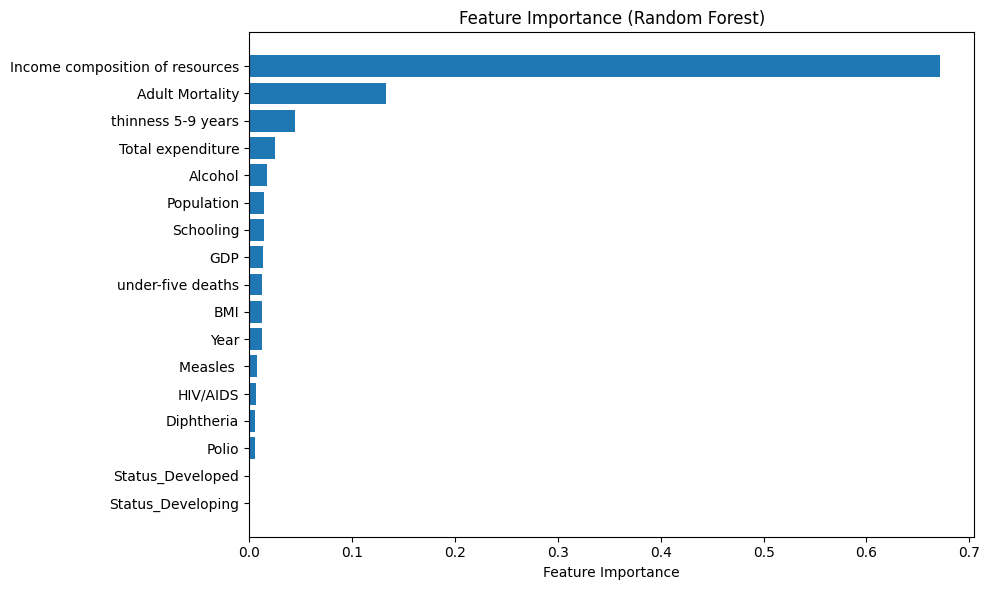

In [33]:
# Cek feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(len(importances))]

# Buat plot
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(importances)
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


### Hyperparameter Tuning

In [34]:
# Model dasar
rf = RandomForestRegressor(random_state=42)

# Grid parameter yang akan di-random search
param_distributions = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 8, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [4, 6, 8],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}


# Randomized search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

important_features = [
    'Income composition of resources', 'Adult Mortality', 'thinness 5-9 years',
    'Total expenditure', 'Alcohol', 'Population',
    'Schooling', 'GDP', 'under-five deaths', 'BMI'
]

X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Fit model
random_search.fit(X_train_selected, y_train)
print(random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


RandomizedSearchCV adalah metode pencarian hyperparameter untuk model machine learning yang melakukan pencarian secara acak pada ruang parameter yang telah ditentukan. Metode ini lebih efisien daripada GridSearchCV, karena tidak mencoba semua kombinasi parameter tetapi memilih acak iterasi yang telah ditentukan.

RandomizedSearchCV digunakan untuk mencari kombinasi parameter terbaik secara acak dari:
* n_estimators: Jumlah pohon dalam hutan
* max_depth: Kedalaman maksimum tiap pohon
* min_samples_split: Minimum sampel untuk membagi node
* min_samples_leaf: Minimum sampel pada daun
* max_features: Jumlah fitur yang dipertimbangkan di setiap split
* bootstrap: Apakah memakai bootstrapped samples atau tidak

Pengaturan RandomizedSearchCV:
* n_iter=50: Jumlah kombinasi parameter yang diacak.
* cv=5: 5-fold cross-validation.
* scoring='r2': Evaluasi berdasarkan nilai R² score.
* n_jobs=-1: Menggunakan seluruh core CPU untuk mempercepat proses.
* random_state=42: Untuk hasil yang konsisten.

Setelah melakukan proses tuning menggunakan RandomizedSearchCV dengan 50 iterasi dan validasi silang sebanyak 5 fold, diperoleh kombinasi hyperparameter terbaik untuk model Random Forest Regressor sebagai berikut:

* n_estimators = 100
Jumlah pohon keputusan (trees) yang digunakan dalam ensemble model adalah 100. Jumlah ini cukup untuk memberikan performa yang stabil tanpa menambah waktu komputasi yang berlebihan.

* min_samples_split = 5
Minimum jumlah sampel yang diperlukan untuk membagi (split) sebuah node dalam pohon keputusan adalah 5. Ini membantu menghindari pembentukan node yang terlalu kecil dan mengurangi risiko overfitting.

* min_samples_leaf = 4
Minimum jumlah sampel yang harus ada di setiap daun (leaf) pohon adalah 4. Ini juga berfungsi sebagai regularisasi agar model tidak terlalu kompleks.

* max_features = 'sqrt'
Setiap pohon hanya menggunakan subset fitur sebanyak akar kuadrat dari total fitur yang tersedia untuk mencari pembagian terbaik, yang dapat meningkatkan keragaman antar pohon dan mengurangi korelasi antar pohon.

* max_depth = 10
Kedalaman maksimum tiap pohon dibatasi hingga 10 tingkat, sehingga pohon tidak tumbuh terlalu dalam dan menghindari overfitting.

* bootstrap = True
Setiap pohon dibangun menggunakan sampling bootstrap (sampling dengan pengembalian) dari data pelatihan, sesuai dengan prinsip Random Forest.


## Evaluasi

Pada evaluasi terdapat 3 tahap evaluasi, yaitu
* Evaluasi Test Set
* Cross-Validation
* Evaluasi Train & Test Hyperparameter Tuning

Menggunakan metrik evaluasi:
* MAE : Mengukur rata-rata selisih absolut antara nilai prediksi dan nilai asli.
* MSE : Mengukur rata-rata kuadrat selisih antara nilai prediksi dan nilai asli.
* RMSE :  Akar dari MSE, menunjukkan seberapa jauh prediksi dari nilai aslinya dalam satuan aslinya.
* R² : Mengukur seberapa baik variabel independen menjelaskan variasi target (0–1).
* Cross-Validation : Membagi data menjadi beberapa subset (fold) untuk melatih dan menguji model secara bergantian.

### Evaluasi Test Set

In [35]:
def evaluate(y_true, y_pred, model_name):
    print(f"{model_name}")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))
    print("="*40)

evaluate(y_test, lr_pred, "Linear Regression")
evaluate(y_test, rf_pred, "Random Forest")
evaluate(y_test, gb_pred, "Gradient Boosting")


Linear Regression
MAE: 2.141503757392989
MSE: 8.316375553550452
RMSE: 2.883812676570802
R² Score: 0.731487625387514
Random Forest
MAE: 1.1829101449275359
MSE: 3.1442941043478125
RMSE: 1.7732157523403103
R² Score: 0.8984795875316107
Gradient Boosting
MAE: 1.3263824607665666
MSE: 3.613384062531356
RMSE: 1.9008903341674805
R² Score: 0.8833339922217691


Dari hasil evaluasi, terlihat bahwa model RandomForest menjadi model terbaik untuk melatih data.

### Cross-Validation

In [36]:
models = {
    "Linear Regression": lr_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, scoring='r2')
    print(f"{name}")
    print("R2 Scores per fold:", scores)
    print("Mean R2 Score:", scores.mean())
    print("="*40)


Linear Regression
R2 Scores per fold: [0.5222473  0.79207648 0.65872436 0.65071043 0.71141348 0.64734045
 0.42935762 0.66393601 0.83509666 0.44257437]
Mean R2 Score: 0.6353477158861963
Random Forest
R2 Scores per fold: [0.66692844 0.82576537 0.64200047 0.76033133 0.81810507 0.84532129
 0.74186212 0.71764    0.83492276 0.74274194]
Mean R2 Score: 0.7595618767521196
Gradient Boosting
R2 Scores per fold: [0.58680135 0.86076636 0.66981387 0.76094351 0.85599803 0.83896054
 0.69687984 0.65864417 0.85529073 0.72048625]
Mean R2 Score: 0.7504584639920904


Evaluasi menggunakan cross-validation memperlihatkan jika model RandomForest tetap model terbaik untuk melatih data. Karena mode Random Forest menjadi model yang paling baik, maka akan dilakukan optimisasi dengan Hyperparameter Tuning menggunakan RandomizedSearchCV agara hasilnya optimal.


### Evaluasi Train & Test Hyperparameter Tuning

In [37]:
# Prediksi untuk train dan test
best_model = random_search.best_estimator_
y_train_pred = best_model.predict(X_train_selected)
y_test_pred = best_model.predict(X_test_selected)

# Evaluasi Train
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Evaluasi Test
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Cetak hasil
print("=== Train Set Evaluation ===")
print("MAE:", mae_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R² Score:", r2_train)

print("\n=== Test Set Evaluation ===")
print("MAE:", mae_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R² Score:", r2_test)


=== Train Set Evaluation ===
MAE: 0.9776833482888506
MSE: 2.0755808737338812
RMSE: 1.440687639196603
R² Score: 0.9318150999682708

=== Test Set Evaluation ===
MAE: 1.3225943306624466
MSE: 3.7232335607270075
RMSE: 1.9295682316847487
R² Score: 0.8797872609058761


* Model tidak overfitting: R² pada train = 0.93 dan test = 0.88, jadi performanya stabil di kedua dataset.

* Perbedaan MAE dan RMSE antara train dan test tidak terlalu besar, yang berarti model berhasil belajar pola tanpa terlalu menghafal data.

* Random Forest Regressor dengan tuning + feature selection memberikan hasil prediksi umur harapan hidup yang akurat.

### Visualisasi

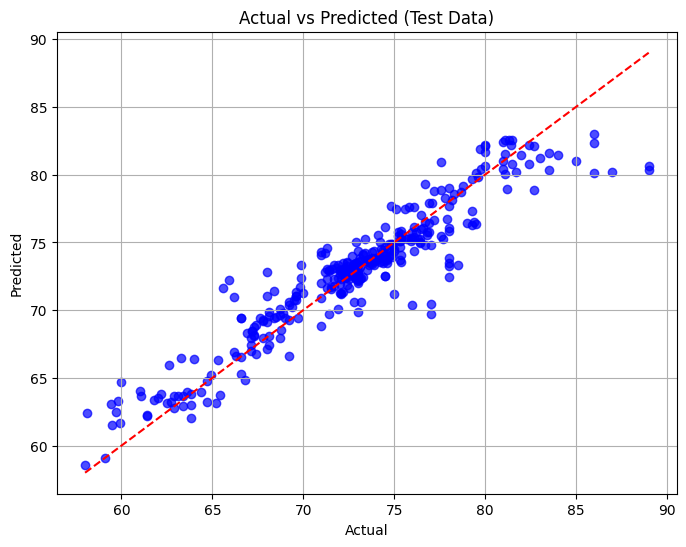

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Test Data)')
plt.grid(True)
plt.show()


## Dampak Model terhadap Business Understanding
### Apakah Model Menjawab Problem Statements?
* **Ya**, model berhasil membangun prediksi umur harapan hidup menggunakan beberapa algoritma regresi, berhasil mengidentifikasi faktor-faktor penting, seperti fitur importance yang telah dissebutkan di atas, dan berhasil menentukan mana algoritma yang memberikan performa terbaik.

### Apakah Model Berhasil Mencapai Goals?
* **Ya**, model berhasil mengidentifikasi fitur-fitur yang signifikan dalam memprediksi harapan hidup, dan model mampu membangun model yang dapat memprediksi dengan akurat. Penggunaan tiga jenis algoritma ini memungkinkan untuk dilakukan perbandingan terhadap performa masing-masing model, dan didapat model terbaik, yaitu Random Forest Regressor.

### Apakah Solusi yang Direncanakan Berdampak?
* **Ya**, model ini berdampak, karena memeberikan prediksi akurat untuk umur harapan hidup, dapat membantu pemngambil kebijakan memahami faktor utama yang mempengaruhi harapan hidup, dan hasil dapat digunakan untuk intervensi kebijakan berbasis data di bidang kesehatan dan ekonomi.
